In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import sys
sys.path.append('..')

In [4]:
import torch

In [5]:
import segmenter as s
import models as m
import utils as u

In [6]:
import models as m
detector = m.Net()

In [7]:
import models as m
detector = m.Net()
u.load_checkpoint_file('../experiments/tst_aug3_lr-5_wd-4/checkpoints/tst_aug3_lr-5_wd-4_iter_last.pth', detector)

288

In [8]:
detector = detector.cuda()
detector.device=torch.device('cuda')

In [9]:
from  grid_dataset import GridDataset

In [10]:
gs = GridDataset('../data', augment=False)

lbl [(1786, 1278), (1815, 1286), (1824, 1257), (1798, 1246)]
lbl [(907, 2201), (932, 2207), (943, 2176), (916, 2171)]


In [11]:
dp = gs[0]

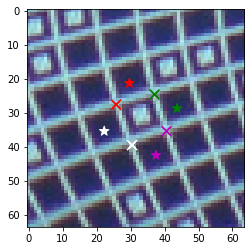

In [12]:
u.plot_target_prediction(dp[0], dp[1], dp[1])

In [13]:
import matplotlib.pyplot as plt

In [14]:
start = (1900, 1350)

In [15]:
seg = s.Segmenter(model=detector, img='../data/P1110843.JPG')

In [16]:
# test img from dataset

In [17]:
if (0,0) in seg.segment_map:
    del seg.segment_map[(0,0)]
pred = seg.detect_on_crop(dp[0], zero=dp[2], crop_scales=dp[3], idx=(0,0))

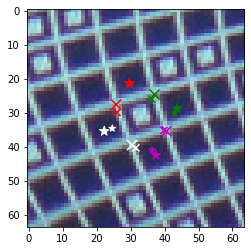

In [18]:
u.plot_target_prediction(dp[0], dp[1], pred[0])

In [21]:
spred = pred[0].clone()
spred[6:6+8] = torch.tensor([0.0, 1, 1, 0, 0, 0, 1, 1])

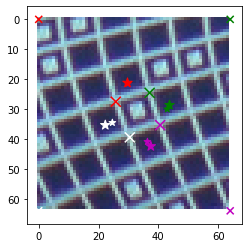

In [26]:
u.plot_target_prediction(dp[0], dp[1], spred)

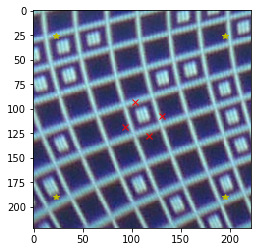

In [19]:
d=seg.segment_map[(0,0)]
seg.visualize_detection(d)

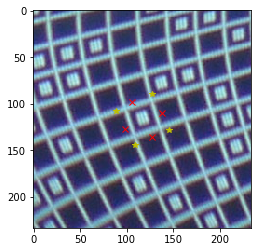

In [70]:
import numpy as np
d = seg.segment_map[(0,0)]
d.corners[:] = gs.dataset[0]['corners'].copy()
d.neighs[:] = gs.dataset[0]['neighs'].copy()

#d.neighs[0][1] += 100

d=seg.segment_map[(0,0)]
seg.visualize_detection(d)

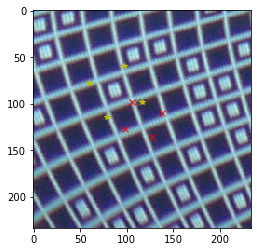

In [50]:
d=seg.segment_map[(0,0)]
seg.visualize_detection(d)

In [23]:
dp = gs[1]

In [24]:
pred = seg.detect_on_crop(dp[0], zero=dp[2], crop_scales=dp[3], idx=(10,10))

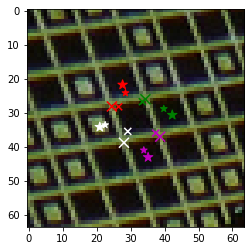

In [25]:
u.plot_target_prediction(dp[0], dp[1], pred[0])

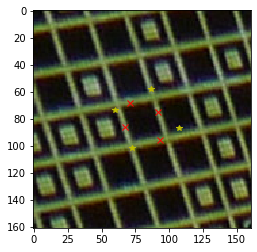

In [27]:
d=seg.segment_map[(10,10)]
seg.visualize_detection(d)

{'img': Array([[[41, 68, 77],
         [40, 64, 76],
         [32, 56, 68],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],
 
        [[53, 79, 80],
         [54, 78, 82],
         [50, 74, 78],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],
 
        [[66, 89, 81],
         [68, 91, 85],
         [67, 88, 83],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],
 
        ...,
 
        [[ 3,  1,  2],
         [ 3,  1,  2],
         [ 2,  2,  2],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],
 
        [[ 3,  1,  2],
         [ 3,  1,  2],
         [ 1,  1,  1],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],
 
        [[ 2,  0,  1],
         [ 2,  0,  1],
         [ 1,  1,  1],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]]], dtype=uint8),
 'color': 1,
 'corners': array([[17

In [33]:
np.array(seg.img.shape) - seg.img_disp*2

array([2520, 3776, -197])

In [35]:
gs.dataset[0]['img'].shape

(2520, 3776, 3)

In [21]:
seg.segment_from(start, cell_size=30, max_steps=5)

#front 5
processing <segmenter.Candidate object at 0x7f6d8ffe74d0>
[1910 1360] [2090 1540]
#front 8
processing <segmenter.Candidate object at 0x7f6d900140d0>
[1915.06281167 1330.32667071] [2141.39886826 1556.6627273 ]
#front 11
processing <segmenter.Candidate object at 0x7f6d90062a90>
[1909.84518108 1271.8570765 ] [2232.54933885 1594.56123427]
#front 14
processing <segmenter.Candidate object at 0x7f6d8ff8e5d0>
[1825.86418785 1156.30578588] [2275.89588021 1606.33747824]
#front 17
processing <segmenter.Candidate object at 0x7f6d8ff8e390>
[1692.15895183  981.51243369] [2346.24649234 1635.5999742 ]


In [22]:
seg.process_front(max_steps=3)

#front 20
processing <segmenter.Candidate object at 0x7f6d8ff8e310>
[1817.26753362 1031.57392035] [2471.35507412 1685.66146086]
#front 23
processing <segmenter.Candidate object at 0x7f6d8ff8eb50>
[1646.69453003 1065.84121923] [2300.78207053 1719.92875974]
#front 26
processing <segmenter.Candidate object at 0x7f6d908adcd0>
[1459.64023091  882.54624276] [2370.02644803 1792.93245988]


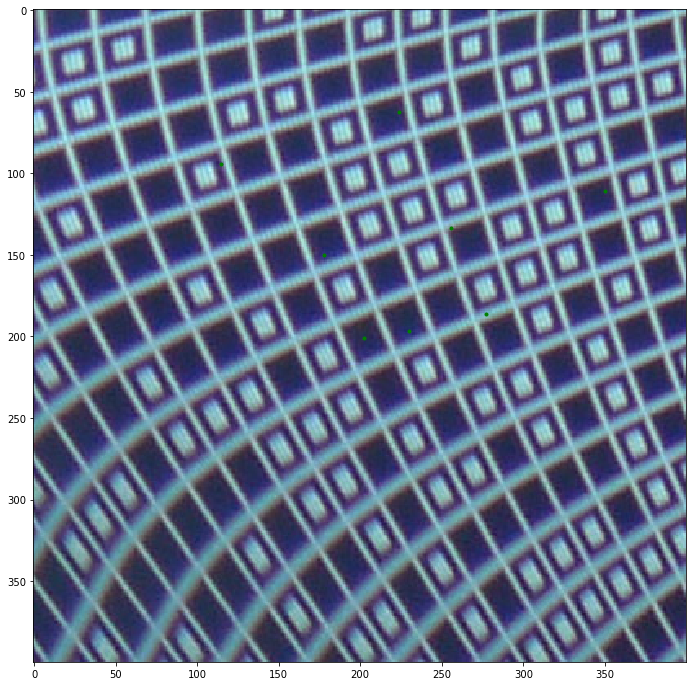

In [23]:
import numpy as np

fig = plt.figure(figsize=(20,12))
ax = fig.gca()
seg.visualize(ax, left=np.array(start) -200, right=np.array(start)+200)

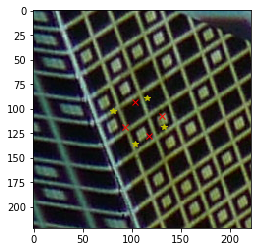

In [26]:
seg.segment_map.keys()

dict_keys([(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (1, 3), (1, 1), (2, 1)])